In [434]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

# Purpose

This notebook is meant to practice analyzing one VA station. 

 

# The Data

In [435]:
master = pd.read_csv("Master/Master.csv")
df = master
df.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Staff_15_To_16_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,0.076763,5.31,2.115538,2.24,0.823529,0.0997,0.0955,0.1133,0.1474,0.0781
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.131691,2.17,0.553571,1.38,0.616071,0.0114,0.0842,0.0891,0.1402,0.0600
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.040680,-0.52,-0.464286,-0.45,-0.511364,0.0620,0.0859,0.0409,0.0814,0.0789
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,0.041831,12.80,7.710843,6.31,5.439655,0.0800,0.0781,0.0898,0.1011,0.0548
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,0.054795,3.09,1.161654,2.50,1.004016,0.0774,0.1134,0.1119,0.0909,0.1343


# Functions

In [436]:
# Used to mark where in a histogram the station is located. 
# Code belongs to Tony Babarino from stackoverflow.com.
# http://stackoverflow.com/questions/35890738/change-the-colour-of-a-matplotlib-histogram-bin-bar-given-a-value

def marked_hist(column,new_ax):
    p = df[column].plot(kind="hist", color='teal',bins=20, ax=new_ax)
    bar_value_to_label = float(Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    p.patches[index_of_bar_to_label].set_color('red')

# The Station

Let's look at Gainesville. It is an incredible outlier with a huge jump in pending cases.

In [437]:
Station = df[df["Station"] == "573"]
station_number = Station["Station"].to_string(index=False)
Station


,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Staff_15_To_16_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15
50,150045,13.93%,9.38,16.55,3.61,573ga,(V08) (573) HCS GAINESVILLE FL,4833.0,4719.0,5116.0,...,0.027686,-3.95,-0.421109,-1.91,-0.270538,0.1129,0.0592,0.0945,0.0707,0.0713


### Marking the station

In [438]:
mark = []
for index, row in df.iterrows():
    if row["Station"] == Station["Station"].to_string(index=False):
        mark.append("mark")
    else:
        mark.append("no")
df["Mark"] = mark
    

# Appointments

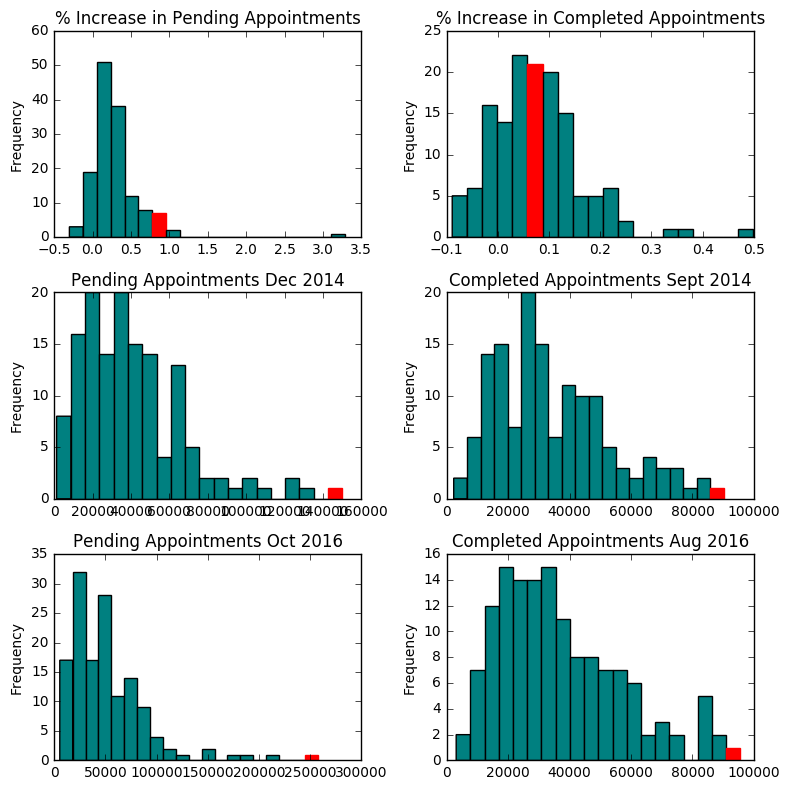

In [458]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

ax1.set_title("% Increase in Pending Appointments")
ax1 = marked_hist("Pending_Increase_%",ax1)
ax2.set_title("% Increase in Completed Appointments")
ax2 = marked_hist("Complete_Increase_%",ax2)
ax3.set_title("Pending Appointments Dec 2014")
ax3 = marked_hist("Appts_Pending_1412",ax3)
ax4.set_title("Completed Appointments Sept 2014")
ax4 = marked_hist("Appts_Complete_1409",ax4)
ax5.set_title("Pending Appointments Oct 2016")
ax5 = marked_hist("Appts_Pending_1610",ax5)
ax6.set_title("Completed Appointments Aug 2016")
ax6 = marked_hist("Appts_Complete_1608",ax6)

plt.tight_layout()

Station 573 had a bigger increase in pending appointments than the median station by 48.46 percentage points.


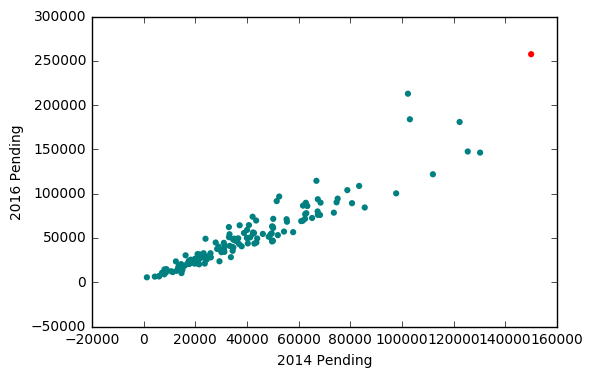

In [440]:
station_pending_increase = (float(Station["Pending_Increase_%"].to_string(index=False))*100) - (df["Pending_Increase_%"].median()*100)


if station_pending_increase > 0 :
    print "Station {} had a bigger increase in pending appointments than the median station by {} percentage points.".format(station_number,round(station_pending_increase,2))
elif station_pending_increase < 0 :
    print "Station {} had a smaller increase in pending appointments than the median station by {} percentage points.".format(station_number,round(station_pending_increase,2))





fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['Appts_Pending_1412'], df['Appts_Pending_1610'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016 Pending")
ax.set_xlabel("2014 Pending")

plt.show()

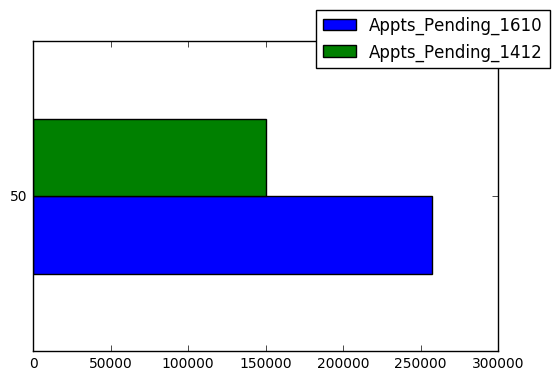

In [441]:
Station[["Appts_Pending_1610","Appts_Pending_1412"]].plot(kind="barh",)

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

Station 573 had a smaller increase in  appointments than the median station by -0.61 percentage points.


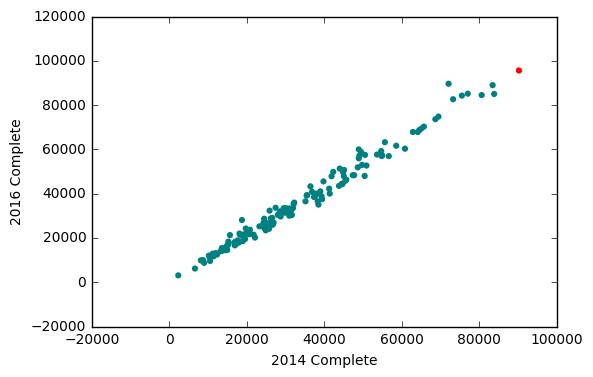

In [442]:
station_complete_increase = (float(Station["Complete_Increase_%"].to_string(index=False))*100) - (df["Complete_Increase_%"].median()*100)


if station_complete_increase > 0 :
    print "Station {} had a bigger increase in  appointments than the median station by {} percentage points.".format(station_number, round((station_complete_increase),2))
elif station_complete_increase < 0 :
    print "Station {} had a smaller increase in  appointments than the median station by {} percentage points.".format(station_number, round((station_complete_increase),2))

fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['Appts_Complete_1409'],df['Appts_Complete_1608'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016 Complete")
ax.set_xlabel("2014 Complete")

plt.show()

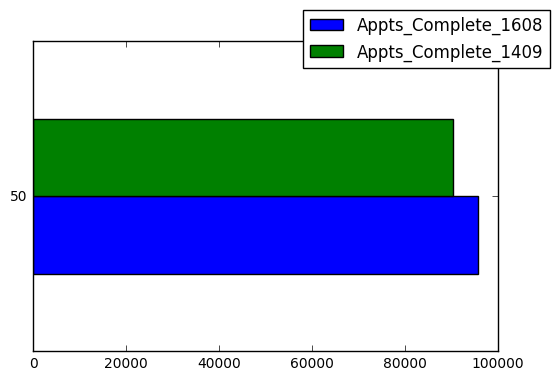

In [443]:
Station[["Appts_Complete_1608","Appts_Complete_1409"]].plot(kind="barh",)

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

# Wait Times

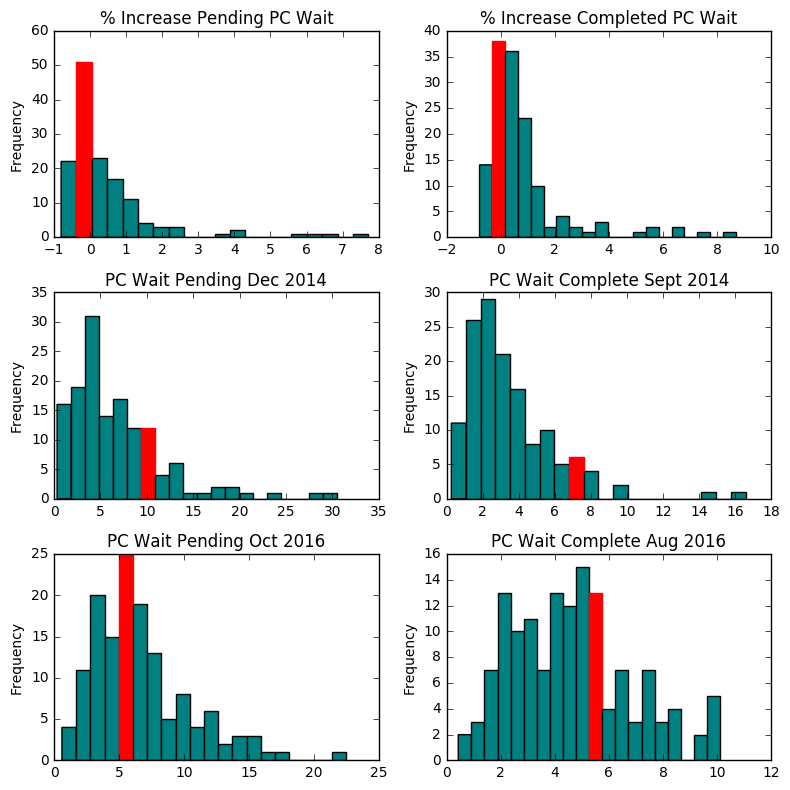

In [457]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

ax1.set_title("% Increase Pending PC Wait")
ax1 = marked_hist("PC_Wait_Pending_Increase_%",ax1)

ax2.set_title("% Increase Completed PC Wait")
ax2 = marked_hist("PC_Wait_Complete_Increase_%",ax2)

ax3.set_title("PC Wait Pending Dec 2014")
ax3 = marked_hist("PC_Wait_Pending_1412",ax3)

ax4.set_title("PC Wait Complete Sept 2014")
ax4 = marked_hist("PC_Wait_Complete_1409",ax4)

ax5.set_title("PC Wait Pending Oct 2016")
ax5 = marked_hist("PC_Wait_Pending_1610",ax5)

ax6.set_title("PC Wait Complete Aug 2016")
ax6 = marked_hist("PC_Wait_Complete_1608",ax6)

plt.tight_layout()

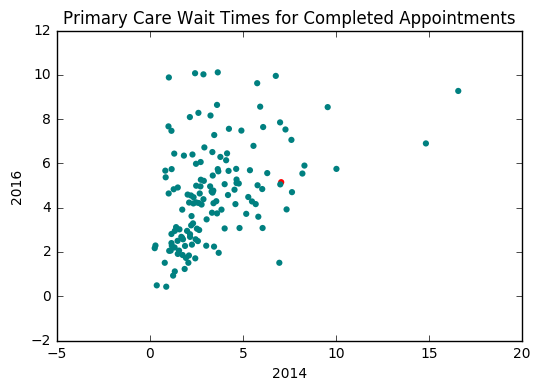

In [445]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Complete_1409'], df['PC_Wait_Complete_1608'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
ax.set_title("Primary Care Wait Times for Completed Appointments")
plt.show()

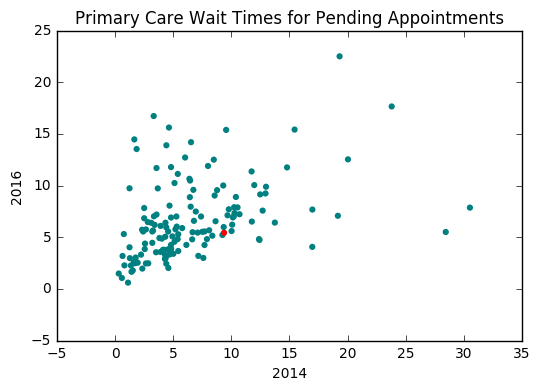

In [446]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Pending_1412'], df['PC_Wait_Pending_1610'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
ax.set_title("Primary Care Wait Times for Pending Appointments")
plt.show()

In [447]:
station_pc_wait_pending_increase = (float(Station["PC_Wait_Pending_Increase_%"].to_string(index=False))*100) - (df["PC_Wait_Pending_Increase_%"].median()*100)

if station_complete_increase > 0 :
    print "Station {} had a bigger increase in  than the median station by {} percentage points.".format(station_number, round((station_pc_wait_pending_increase),2))
elif station_complete_increase < 0 :
    print "Station {} had a smaller increase in  than the median station by {} percentage points.".format(station_number, round((station_pc_wait_pending_increase),2))





Station 573 had a smaller increase in  than the median station by -42.39 percentage points.


# Hiring

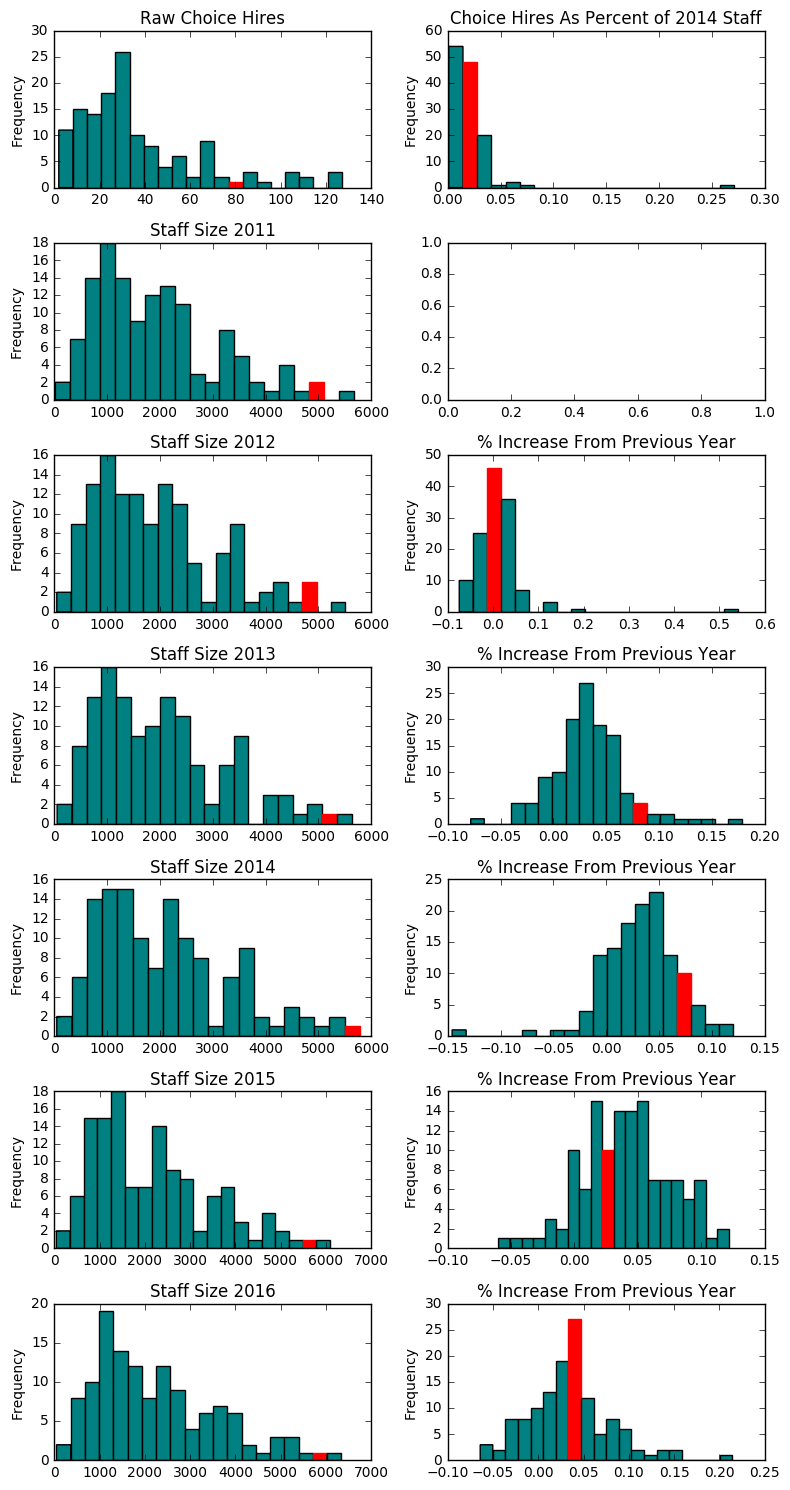

In [456]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12),(ax13, ax14)) = plt.subplots(nrows=7, ncols=2, figsize=(8,15))

ax1.set_title("Raw Choice Hires")
ax1 = marked_hist("Choice_Hires",ax1)

ax2.set_title("Choice Hires As Percent of 2014 Staff")
ax2 = marked_hist("Choice_Increase_%",ax2)

ax3.set_title("Staff Size 2011")
ax3 = marked_hist("MAY-FY11", ax3)

ax5.set_title("Staff Size 2012")
ax5 = marked_hist("MAY-FY12", ax5)

ax6.set_title("% Increase From Previous Year")
ax6 = marked_hist("Staff_11_To_12_Increase_%",ax6)

ax7.set_title("Staff Size 2013")
ax7 = marked_hist("MAY-FY13", ax7)

ax8.set_title("% Increase From Previous Year")
ax8 = marked_hist("Staff_12_To_13_Increase_%",ax8)

ax9.set_title("Staff Size 2014")
ax9 = marked_hist("MAY-FY14", ax9)

ax10.set_title("% Increase From Previous Year")
ax10 = marked_hist("Staff_13_To_14_Increase_%",ax10)

ax11.set_title("Staff Size 2015")
ax11 = marked_hist("MAY-FY15", ax11)

ax12.set_title("% Increase From Previous Year")
ax12 = marked_hist("Staff_14_To_15_Increase_%",ax12)

ax13.set_title("Staff Size 2016")
ax13 = marked_hist("MAY-FY16", ax13)

ax14.set_title("% Increase From Previous Year")
ax14 = marked_hist("Staff_15_To_16_Increase_%",ax14)

plt.tight_layout()

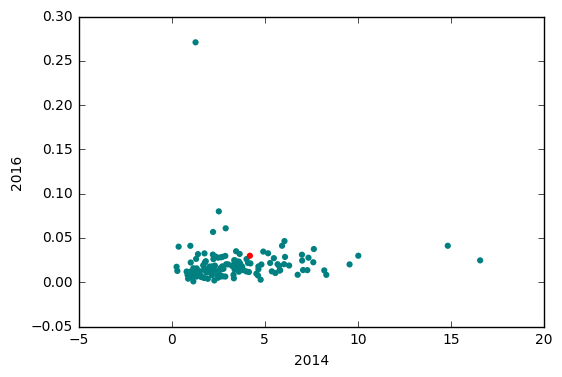

In [449]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df['PC_Wait_Complete_1409'], df['Choice_Increase_%'], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none')
ax.set_ylabel("2016")
ax.set_xlabel("2014")
#ax.set_title("Primary Care Wait Times for Completed Appointments")
plt.show()

# Turnover

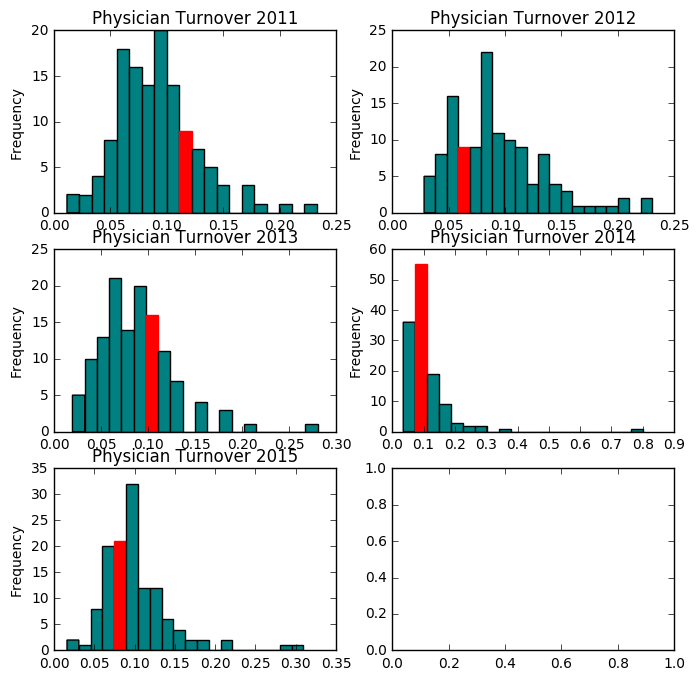

In [467]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

ax1.set_title("Physician Turnover 2011")
ax1 = marked_hist("Physician_Turnover_FY11",ax1)

ax2.set_title("Physician Turnover 2012")
ax2 = marked_hist("Physician_Turnover_FY12",ax2)

ax3.set_title("Physician Turnover 2013")
ax3 = marked_hist("Physician_Turnover_FY13",ax3)

ax4.set_title("Physician Turnover 2014")
ax4 = marked_hist("Physician_Turnover_FY14",ax4)

ax5.set_title("Physician Turnover 2015")
ax5 = marked_hist("Physician_Turnover_FY15",ax5)



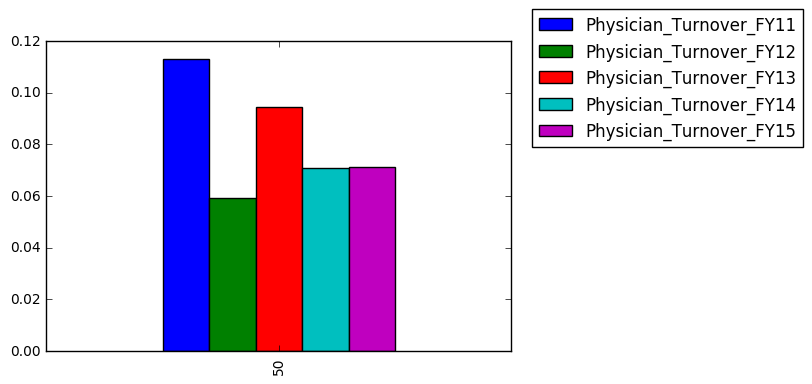

In [469]:
Station[["Physician_Turnover_FY11","Physician_Turnover_FY12","Physician_Turnover_FY13","Physician_Turnover_FY14","Physician_Turnover_FY15"]].plot(kind='bar')

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

In [472]:
Station["Interim"]

50    3.0
Name: Interim, dtype: float64